In [10]:
import cPickle as pickle
import seaborn as sns
import numpy as np
import pandas as pd

In [11]:
class Stats(object):
    def __init__(self):
        self.stats = [] # Keeps all stats for each episode
        self.cntNegreward = 0    # Number of negative rewards (bad driving) in this trial
        self.lastDeadLineVal = 0 # Value of the deadline last time the agent was run. 1 means agent did not meet deadline

    def reset(self):
        self.stats.append((self.lastDeadLineVal, self.cntNegreward))
        self.cntNegreward = 0
        self.lastDeadLineVal = 0

In [12]:
alphaGammaMat = pickle.load(open('../results-iterate-alpha-gamma.pickle'))

In [13]:
import math
def create2DMatFromDict(dictWith2dKeys):
    side = int(math.sqrt(len(dictWith2dKeys)))
    arr = np.arange(len(dictWith2dKeys)).reshape(side, side)
    for key,val in dictWith2dKeys.iteritems():
        arr[key[0],key[1]] = val
    return arr

In [54]:
print alphaGammaMat[(10,10)].stats

[(0, 0), (0, 3), (16, 0), (13, 0), (9, 0), (25, 0), (17, 2), (27, 0), (25, 0), (17, 0), (13, 0), (7, 0), (9, 0), (4, 1), (7, 0), (21, 0), (13, 0), (19, 0), (31, 0), (21, 0), (7, 0), (17, 0), (16, 1), (13, 0), (21, 0), (39, 0), (13, 0), (17, 0), (25, 0), (21, 0), (10, 1), (25, 0), (0, 0), (29, 0), (25, 0), (15, 0), (27, 0), (17, 0), (25, 2), (13, 0), (29, 0), (17, 0), (14, 0), (29, 0), (11, 0), (9, 0), (25, 0), (33, 0), (37, 0), (14, 0), (21, 0), (15, 0), (17, 0), (3, 0), (5, 0), (19, 0), (15, 0), (2, 0), (13, 0), (22, 0), (27, 0), (10, 0), (16, 0), (35, 0), (27, 0), (19, 0), (16, 0), (17, 0), (36, 0), (25, 0), (19, 1), (24, 0), (12, 0), (9, 0), (18, 0), (18, 0), (31, 0), (36, 0), (16, 0), (14, 0), (13, 0), (14, 0), (14, 0), (24, 0), (34, 0), (37, 0), (19, 0), (14, 0), (16, 0), (14, 0), (12, 0), (10, 0), (23, 0), (29, 0), (16, 0), (21, 0), (11, 0), (15, 0), (19, 0), (27, 0)]


In [55]:
getNumCompletedTrip = lambda statsList: [1 if x[0] > 0 else 0 for x in statsList]
deadLineLeft = {key: np.sum(getNumCompletedTrip(val.stats)) for key, val in alphaGammaMat.iteritems() }
    

In [56]:
print deadLineLeft

{(7, 3): 98, (6, 9): 98, (0, 7): 11, (1, 6): 98, (0, 10): 17, (3, 7): 98, (2, 5): 98, (8, 5): 98, (5, 8): 94, (4, 0): 99, (10, 8): 98, (9, 0): 99, (6, 7): 99, (5, 5): 98, (10, 7): 99, (7, 6): 98, (6, 10): 95, (0, 4): 23, (1, 1): 99, (4, 10): 97, (3, 2): 99, (2, 6): 99, (8, 2): 99, (4, 5): 98, (9, 3): 98, (6, 0): 97, (7, 5): 96, (0, 1): 22, (3, 1): 99, (9, 9): 99, (7, 8): 96, (2, 1): 97, (8, 9): 84, (9, 4): 98, (5, 1): 99, (10, 3): 98, (7, 2): 98, (1, 5): 99, (3, 6): 90, (2, 2): 98, (1, 10): 98, (8, 6): 99, (4, 1): 97, (10, 9): 98, (9, 7): 99, (6, 4): 96, (5, 4): 99, (10, 4): 98, (7, 1): 99, (0, 5): 16, (1, 0): 96, (0, 8): 16, (3, 5): 99, (2, 7): 98, (8, 3): 99, (5, 10): 99, (4, 6): 97, (10, 10): 97, (9, 2): 99, (6, 1): 99, (5, 7): 98, (7, 4): 99, (0, 2): 20, (1, 3): 97, (4, 8): 99, (3, 0): 98, (2, 8): 99, (9, 8): 98, (8, 0): 98, (6, 2): 99, (3, 10): 97, (8, 10): 97, (5, 0): 99, (10, 0): 99, (1, 4): 98, (3, 9): 98, (2, 3): 99, (1, 9): 97, (8, 7): 98, (4, 2): 96, (9, 6): 96, (6, 5): 98, 

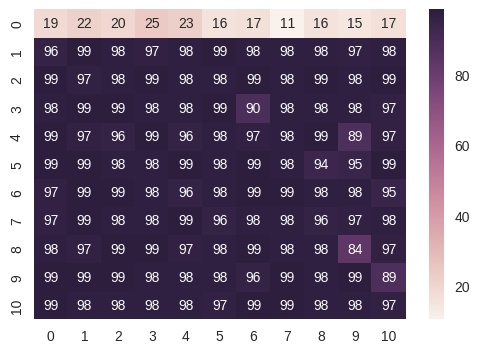

In [57]:
%matplotlib inline
sns.heatmap(create2DMatFromDict(deadLineLeft),annot=True)

In [62]:
getNumNegReward = lambda statsList: sum(x[1] for x in statsList)
numNegRewards = {key: getNumNegReward(val.stats) for key, val in alphaGammaMat.iteritems() }

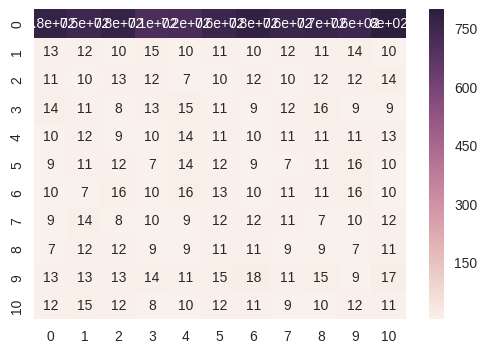

In [63]:
%matplotlib inline
sns.heatmap(create2DMatFromDict(numNegRewards),annot=True)